In [108]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns

In [109]:
# run block of code and catch warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

In [110]:
train = pd.read_csv('titanic-data/train.csv')
test = pd.read_csv('titanic-data/test.csv')

In [111]:
test.shape

(418, 11)

In [112]:
def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df


train = process_age(train)
test= process_age(test)
for column in ['Age_categories', 'Pclass', 'Sex']:
    train = create_dummies(train, column)
    test = create_dummies(test, column)
    
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')


In [113]:
# The holdout set has a missing value in the Fare column which
test["Fare"] = test["Fare"].fillna(train["Fare"].mean())
columns = ["SibSp","Parch","Fare"]
train['Embarked'] = train['Embarked'].fillna('S')


test['Embarked'] = test['Embarked'].fillna('S')
train = create_dummies(train, 'Embarked')
test = create_dummies(test, 'Embarked')
for col in columns:
    train[col + "_scaled"] = minmax_scale(train[col])
    test[col + "_scaled"] = minmax_scale(test[col])   

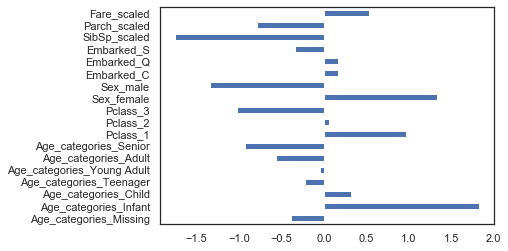

In [114]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']


lr = LogisticRegression(solver='lbfgs')
lr.fit(train[columns], train['Survived'])
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index=train[columns].columns)
feature_importance.plot.barh()
plt.show()

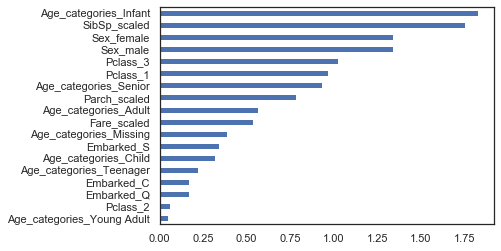

In [115]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show() 

In [116]:
## 
scores = cross_val_score(lr, train[columns], train['Survived'], cv=10)
accuracy = scores.mean()
print(accuracy)

0.8148399727613211


In [117]:
lr.fit(train[columns],train['Survived'])
test_predictions = lr.predict(test[columns])

test_ids = test["PassengerId"]
submission_df = {"PassengerId": test_ids,"Survived": test_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_1.csv",index=False)

In [118]:
#submission_df

In [119]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df, cut_points, label_names):
    df['Fare_categories'] = pd.cut(df['Fare'], cut_points, labels = label_names)
    return df

cut_points = [0,12,50,100,1000]
label_names = ["0-12","12-50","50-100","100+"]

train = process_fare(train,cut_points,label_names)
test = process_fare(test,cut_points,label_names)

train = create_dummies(train,"Fare_categories")
test = create_dummies(test,"Fare_categories")

In [120]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled,Fare_categories,Fare_categories_0-12,Fare_categories_12-50,Fare_categories_50-100,Fare_categories_100+
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,0.000,0.000000,0.015282,0-12,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,1,0.125,0.000000,0.013663,0-12,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,0,0.000,0.000000,0.018909,0-12,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,1,0.000,0.000000,0.016908,0-12,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,1,0.125,0.111111,0.023984,12-50,0,1,0,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,...,0,1,0.000,0.000000,0.018006,0-12,1,0,0,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,...,1,0,0.000,0.000000,0.014891,0-12,1,0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,...,0,1,0.125,0.111111,0.056604,12-50,0,1,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,...,0,0,0.000,0.000000,0.014110,0-12,1,0,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,...,0,1,0.250,0.000000,0.047138,12-50,0,1,0,0


In [121]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train["Title"] = extracted_titles.map(titles)

In [122]:
extracted_titles = test["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
test["Title"] = extracted_titles.map(titles)

train["Cabin_type"] = train["Cabin"].str[0]
train["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

test["Cabin_type"] = test["Cabin"].str[0]
test["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

for column in ["Title","Cabin_type"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

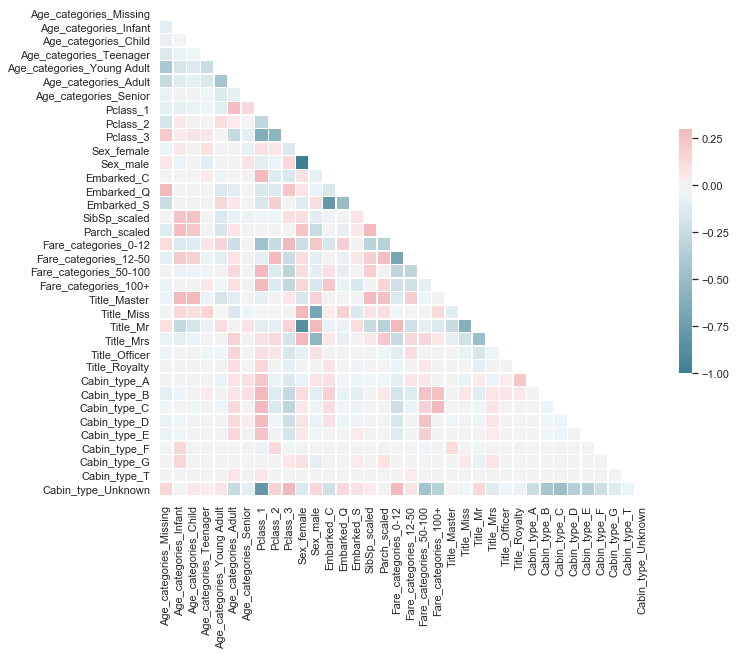

In [123]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']
plot_correlation_heatmap(train[columns])

In [128]:
from sklearn.feature_selection import RFECV

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

selector = RFECV(lr,cv=10)
selector.fit(train[columns],train['Survived'])
optimized_columns = train[columns].columns[selector.support_]
print(optimized_columns)

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')


In [129]:
scores = cross_val_score(lr,train[optimized_columns], train["Survived"], cv=10)
accuracy = scores.mean()
print(accuracy)

0.8226549199863807


In [131]:
all_X = train[optimized_columns]
all_y = train["Survived"]
lr.fit(all_X, train['Survived'])
test_predictions = lr.predict(test[optimized_columns])
test_ids = test["PassengerId"]
submission_df = {"PassengerId": test_ids,"Survived": test_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_2.csv",index=False)